<div align="center">
    <h1>Regression Gone Wrong</h1>
    <h2>@maxhumber</h2>
    <h4>Boston • ODSC • May 2, 2019</h4>
</div>

<div align="center">
    <img src="images/ymxb.png" height="600" width="600">
</div>

<div align="center">
    <img src="images/datalol.png" height="500" width="500">
</div>

<div align="center">
    <img src="images/titanic.jpg" height="500" width="500">
</div>

<div align="center">
    <img src="images/hockey_clipart.jpg" height="500" width="500">
</div>

<div align="center">
    <img src="images/toronto.jpg" height="800" width="800">
</div>

<div align="center">
    <img src="images/bruins.jpg" height="700" width="700">
</div>

<div align="center">
    <img src="images/leafs_ice.jpg" height="600" width="600">
</div>

<div align="center">
    <b><font size="+10">Regression 101</font></b>
</div>

In [1]:
# step 1:
import pandas as pd

In [2]:
# step 2 - drop NAs:
df = pd.read_csv('data/skaters.csv')
columns = ['name', 'age', 'position', 'goals', 'assists', 'plus_minus', 'shots_on_goal', 'blocks', 'hits']
df = df[columns].dropna()

In [3]:
from IPython.core.display import HTML

def display(df, index=False):
    return HTML(df.to_html(
        index=index,
        classes='table table-responsive table-striped table-bordered'
    ))

display(df.sample(5))

name,age,position,goals,assists,plus_minus,shots_on_goal,blocks,hits
Josh Bailey,26.0,C,12,20,-7,105,25.0,45.0
Mathieu Perreault,25.0,C,6,11,7,47,8.0,28.0
Cal Clutterbuck,30.0,RW,8,10,-7,101,53.0,226.0
Lars Eller,24.0,C,12,14,-15,137,58.0,130.0
Patrick Eaves,31.0,RW,11,6,-5,86,20.0,70.0


In [4]:
# step 3 - target:
y = df['goals']
X = df[['age', 'assists', 'plus_minus', 'shots_on_goal', 'blocks', 'hits']]

In [5]:
# step 4:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1993)

In [6]:
# step 5:
from sklearn.linear_model import LinearRegression

In [7]:
# step 6:
model = LinearRegression()

In [8]:
# step 7:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
# step 8:
y_hat = model.predict(X_test)

In [10]:
# step 9:
from sklearn.metrics import r2_score, mean_absolute_error
print(f'R^2: {r2_score(y_test, y_hat):.2f}')
print(f'MAE: {mean_absolute_error(y_test, y_hat):.2f}')

R^2: 0.81
MAE: 2.96


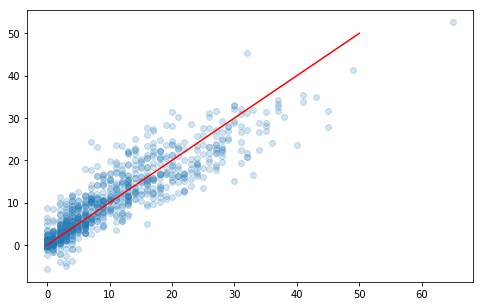

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_hat, alpha=1/5)
plt.plot([0, 50], [0, 50], c='r');

In [12]:
display(df.sample(5))

name,age,position,goals,assists,plus_minus,shots_on_goal,blocks,hits
Paul Stastny,30.0,C,10,39,3,103,40.0,32.0
Rasmus Ristolainen,23.0,D,6,35,-25,182,111.0,206.0
Jean-Gabriel Pageau,23.0,C,19,24,17,133,60.0,166.0
Justin Bailey,20.0,RW,0,0,-2,22,6.0,8.0
Brayden Schenn,21.0,C,8,18,-8,79,22.0,109.0


<h1>My model...</h1>
<ol>
    <li>can't accept new data...</li>
    <li>isn't benchmarked...</li>
    <li><i>maybe</i> isn't using the right algorithm...</li>
</ol>

<div align="center">
    <img src="https://media.giphy.com/media/Bw7fyRylzteWk/giphy.gif" height="600" width="600">
</div>

<br>
<div align="center">
    <b><font size="+10">#YouSuckAtRegression</font></b>
</div>
<br>
<div align="center">
    <img src="https://i.imgur.com/GfJNU68.gif" height="600" width="600">
</div>

<h1>Models</h1>
<ol>
    <li>Multiple Output Regression...</li>
    <li>Ordinal Regression...</li>
    <li>Poisson Regression...</li>
</ol>

<h1>Problems</h1>
<ol>
    <li>...Next Year</li>
    <li>...Diamonds in the Rough</li>
    <li>...Over/Under</li>
</ol>

<div align="center">
    <h1>Multiple Output Regression</h1>
</div>

<div align="center">
    <img src="images/prediction_machine.png" height="600" width="600">
</div>

In [13]:
import pandas as pd 

df = pd.read_csv('data/skaters.csv')
# quick clean
df['season_start'] = df['season'].apply(lambda x: int(x[:4]))
df = df.query('season_start >= 2007')
df['position'] = df['position'].apply(
    lambda x: 'Multiple' if '/' in x else x)

In [14]:
Y_columns = [
    'goals', 'assists', 'plus_minus', 
    'shots_on_goal', 'blocks', 'hits']
X_columns = ['position', 'age'] + Y_columns

In [15]:
display(
    df[['name', 'season'] + X_columns]
    .query('name == "Mitch Marner"')
)

name,season,position,age,goals,assists,plus_minus,shots_on_goal,blocks,hits
Mitch Marner,2016-17,C,19.0,19,42,0,176,39.0,41.0
Mitch Marner,2017-18,C,20.0,22,47,-1,194,25.0,31.0
Mitch Marner,2018-19,C,21.0,26,68,22,233,43.0,29.0


In [16]:
# shift everything by a year 
Y = df.groupby('id')[Y_columns].shift(-1)
X = df[X_columns]
# drop out dangling Y rows...
X = X[~pd.isnull(Y).any(axis=1)]
Y = Y.dropna()
# reset index
Y = Y.reset_index(drop=True)
X = X.reset_index(drop=True)

In [17]:
display(X.head(), index=True)

,position,age,goals,assists,plus_minus,shots_on_goal,blocks,hits
0,C,22.0,0,3,2,9,2.0,0.0
1,D,23.0,0,3,-2,12,9.0,6.0
2,C,18.0,18,34,-2,134,33.0,38.0
3,C,19.0,4,20,3,78,27.0,27.0
4,C,20.0,19,37,-12,178,35.0,72.0


In [18]:
display(Y.head(), index=True)

,goals,assists,plus_minus,shots_on_goal,blocks,hits
0,0.0,8.0,2.0,52.0,10.0,3.0
1,0.0,6.0,9.0,42.0,35.0,33.0
2,4.0,20.0,3.0,78.0,27.0,27.0
3,19.0,37.0,-12.0,178.0,35.0,72.0
4,24.0,32.0,-12.0,189.0,37.0,92.0


In [19]:
X_train, X_test, Y_train, Y_test = (
    train_test_split(X, Y, test_size=0.2, random_state=42)
)

<div align="center">
    <img src="images/secret_sauce.jpg" height="600" width="600">
</div>

In [20]:
from sklearn_pandas import DataFrameMapper, CategoricalImputer
from sklearn.preprocessing import PolynomialFeatures, LabelBinarizer
from sklearn.impute import SimpleImputer

mapper = DataFrameMapper([
    (['age'], [SimpleImputer(), PolynomialFeatures(include_bias=False)]),
    (['position'], [CategoricalImputer(), LabelBinarizer()]),
    (['goals'], SimpleImputer()),
    (['assists'], SimpleImputer()),
    (['plus_minus'], SimpleImputer()),
    (['shots_on_goal'], SimpleImputer()),
    (['blocks'], SimpleImputer()),
    (['hits'], SimpleImputer())
])

In [21]:
Z_train = mapper.fit_transform(X_train)
Z_test = mapper.transform(X_test)

In [22]:
from sklearn.multioutput import MultiOutputRegressor

multi_model = MultiOutputRegressor(LinearRegression())
multi_model.fit(Z_train, Y_train)

MultiOutputRegressor(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
           n_jobs=None)

In [23]:
display(pd.DataFrame(Z_test, columns=mapper.transformed_names_)
    [Y_columns].head(2),index=True
)

,goals,assists,plus_minus,shots_on_goal,blocks,hits
0,0.0,0.0,-1.0,0.0,1.0,3.0
1,21.0,39.0,19.0,152.0,54.0,77.0


In [24]:
display(pd.DataFrame(multi_model.predict(Z_test), columns=Y_columns)
    .head(2), index=True
)

,goals,assists,plus_minus,shots_on_goal,blocks,hits
0,2.365496,7.729889,-1.287782,50.991012,38.849421,45.008994
1,17.306302,32.612045,5.246068,148.247476,49.772165,68.536912


<div align="center">
    <img src="images/deeper.jpg" height="600" width="600">
</div>

In [50]:
import numpy as np
np.random.seed(42)

df['goals_next_year'] = df.groupby('name')['goals'].shift(-1)
df['shots_on_goal_next_year'] = df.groupby('name')['shots_on_goal'].shift(-1)
df = df.dropna(subset=['goals_next_year', 'shots_on_goal_next_year'])

names = list(df.name.unique())
train_names = np.random.choice(names, size=round(len(names) * 0.80), replace=False)
train = df[df.name.isin(train_names)]
test = df[~df.name.isin(train_names)]

In [51]:
# separate targets
y_train_goals = train['goals_next_year'].values
y_train_sog = train['shots_on_goal_next_year'].values
y_test_goals = test['goals_next_year'].values
y_test_sog = test['shots_on_goal_next_year'].values

In [52]:
X_cols = ['age', 'position', 'games_played', 'time_on_ice_total',
    'goals', 'shots_on_goal', 'shots_attempted_total']
X_train = train[X_cols]
X_test = test[X_cols]

In [53]:
from sklearn.preprocessing import StandardScaler

mapper = DataFrameMapper([
    (['age'], [SimpleImputer(), PolynomialFeatures(include_bias=False), StandardScaler()]),
    (['position'], [CategoricalImputer(), LabelBinarizer()]),
    (['games_played'], [SimpleImputer(), StandardScaler()]),
    (['time_on_ice_total'], [SimpleImputer(), StandardScaler()]),
    (['goals'], [SimpleImputer(), StandardScaler()]),
    (['shots_on_goal'], [SimpleImputer(), StandardScaler()]),
    (['shots_attempted_total'], [SimpleImputer(), StandardScaler()])
    ], df_out=False
)
Z_train = mapper.fit_transform(X_train)
Z_test = mapper.transform(X_test)

In [54]:
from tensorflow.keras import layers, Input, Model

data_input = Input(shape=(Z_train.shape[1],), dtype='float64', name='last_season')
x = layers.Dense(100, activation='relu')(data_input)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dropout(0.25)(x)
x = layers.Dense(5, activation='relu')(x)
goals_prediction = layers.Dense(1, name='goals')(x)
sog_prediction = layers.Dense(1, name='shots_on_goal')(x)
model = Model(data_input, [goals_prediction, sog_prediction])

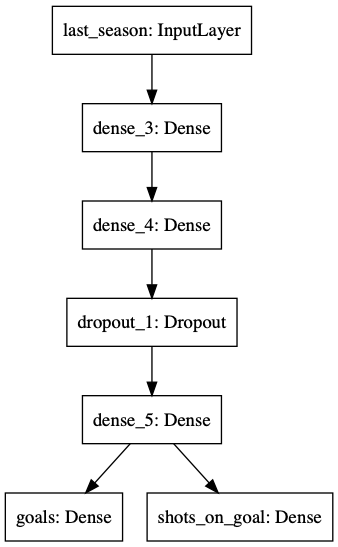

In [55]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [56]:
model.compile(
    optimizer='Nadam',
    loss={'goals': 'mse', 'shots_on_goal': 'mse'},
    loss_weights={'goals': 10, 'shots_on_goal': 1 / 10},
)
model.fit(Z_train, [y_train_goals, y_train_sog], epochs=20, batch_size=5)

Epoch 1/20
2877/2877 [==============================] - 1s 389us/sample - loss: 2149.3152 - goals_loss: 64.2252 - shots_on_goal_loss: 15070.6348
Epoch 2/20
2877/2877 [==============================] - 1s 252us/sample - loss: 1021.4085 - goals_loss: 48.5153 - shots_on_goal_loss: 5362.5605
Epoch 3/20
2877/2877 [==============================] - 1s 252us/sample - loss: 734.0616 - goals_loss: 46.1573 - shots_on_goal_loss: 2724.8850
Epoch 4/20
2877/2877 [==============================] - 1s 254us/sample - loss: 698.0107 - goals_loss: 44.6464 - shots_on_goal_loss: 2515.4719
Epoch 5/20
2877/2877 [==============================] - 1s 258us/sample - loss: 667.0865 - goals_loss: 43.0573 - shots_on_goal_loss: 2365.1367
Epoch 6/20
2877/2877 [==============================] - 1s 257us/sample - loss: 657.3808 - goals_loss: 42.8418 - shots_on_goal_loss: 2289.6306
Epoch 7/20
2877/2877 [==============================] - 1s 255us/sample - loss: 639.5159 - goals_loss: 41.7639 - shots_on_goal_loss: 2218.7

In [57]:
X_new = pd.DataFrame({
    'age': [28],
    'position': ['D'],
    'games_played': [71],
    'time_on_ice_total': [1899],
    'goals': [9],
    'shots_on_goal': [196],
    'shots_attempted_total': [423]
})
Z_new = mapper.transform(X_new)
model.predict(Z_new)

[array([[13.27651784]]), array([[208.13033611]])]

In [59]:
y_hat_test_goals = model.predict(Z_test)[0][:, 0]
y_hat_test_sog = model.predict(Z_test)[1][:, 0]

preds = pd.DataFrame({
    'goals': y_test_goals,
    'goals_predicted': np.round(y_hat_test_goals),
    'sog': y_test_sog,
    'sog_predicted': y_hat_test_sog,
})

print(r2_score(preds['goals'], preds['goals_predicted']))
print(r2_score(preds['sog'], preds['sog_predicted']))

0.5837523512405647
0.5371085695378974


<div align="center">
    <h1>Ordinal Regression</h1>
</div>

![](images/fantasy_settings.png)

![](images/nhl_blotto.png)

![](images/adp.png)

In [ ]:
import pandas as pd

CATEGORIES = [
    'goals',
    'assists',
    'plus_minus',
    'powerplay_points',
    'shots_on_goal',
    'hits',
    'blocks',
    'wins',
    'goals_against_average',
    'saves',
    'save_percentage',
    'shutouts'
]

raw = pd.read_csv('data/nhl_draft_2018.csv')
df = raw.copy()

In [ ]:
import numpy as np 

np.random.seed(1)
df.sample(10)

In [ ]:
from sklearn.model_selection import train_test_split 

target = 'adp'

y = df[target].values
X = df.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([
    ('position', LabelBinarizer()),
    (['goals'], StandardScaler()),
    (['assists'], StandardScaler()),
    (['plus_minus'], StandardScaler()),
    (['powerplay_points'], StandardScaler()),
    (['shots_on_goal'], StandardScaler()),
    (['hits'], StandardScaler()),
    (['blocks'], StandardScaler()),
    (['wins'], StandardScaler()),
    (['goals_against_average'], StandardScaler()),
    (['saves'], StandardScaler()),
    (['save_percentage'], StandardScaler()),
    (['shutouts'], StandardScaler())
], df_out=True)

X_train = mapper.fit_transform(X_train)
X_test = mapper.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

lr.predict(X_test)[:10]

# 🙅🏻‍♀️

In [ ]:
#!pip install mord

import mord

model = mord.OrdinalRidge(fit_intercept=False)

model.fit(X_train, y_train)

model.predict(X_test)[:5]

In [ ]:
compare = pd.DataFrame({
    'true': y_test,
    'pred': model.predict(X_test)
})

compare.head()

In [ ]:
import altair as alt
alt.renderers.enable('notebook')

(
    alt.Chart(compare)
    .mark_point()
    .encode(
        x='true', 
        y='pred'
    )
)

In [ ]:
from sklearn.metrics import r2_score

r2_score(compare['true'], compare['pred'])

In [ ]:
bias = pd.DataFrame({
    'feature': mapper.transformed_names_,
    'coef': model.coef_
}).sort_values('coef')

bias = bias[~bias.feature.str.contains('position')]

In [ ]:
bias

> Underdogs can change the odds of winning simply by changing the basis of competition.

[Source](https://fs.blog/2010/07/colonel-blotto-game/)

![](images/nhl_blotto.png)

In [ ]:
df.head()

In [ ]:
# GAA is a bad thing, need to reverse
df['goals_against_average'] = -df['goals_against_average']

df[CATEGORIES] = (
    df
    [CATEGORIES]
    .apply(lambda x: (x - x.min()) / (x.max() - x.min()))
)

In [ ]:
df.head()

In [ ]:
def blotto(x, out_range=[0.80, 1]):
    domain = np.min(x), np.max(x)
    y = (x - (domain[1] + domain[0]) / 2) / (domain[1] - domain[0])
    return y * (out_range[1] - out_range[0]) + (out_range[1] + out_range[0]) / 2

bias['mod'] = bias[['coef']].apply(lambda x: blotto(x, (0.8, 1)))
bias = bias[['feature', 'mod']].set_index('feature').iloc[:,0]

bias

In [ ]:
df[list(bias.keys())] *= bias

df.head()

In [ ]:
from copy import deepcopy

cats = deepcopy(CATEGORIES)

cats.remove('goals')
cats.remove('shutouts')

df['score'] = df[cats].sum(axis=1)

df[['name', 'position', 'score']].head(10)

![](images/fantasy_settings.png)

In [ ]:
starters = {'C': 2, 'LW': 2, 'RW': 2, 'D': 4, 'G': 2}

players = sum(starters.values())
skaters = sum([value for key, value in starters.items() if key != 'G'])
goalies = players - skaters

print(skaters)
print(goalies)

In [ ]:
# df['score'] = df['score'] / players
df['score'] = np.where(df['position'] == 'G', df['score'] / goalies, df['score'] / skaters)

df[['name', 'position', 'score']].head()

In [ ]:
raw.groupby('position').mean()

In [ ]:
pool_size = 10

for position, slots in starters.items():
    replacement = (
        df[df['position'] == position]
        .sort_values('score', ascending=False)
        .head(slots * pool_size)
        ['score']
        .mean()
    )
    df.loc[df['position'] == position, 'score'] = df['score'] - replacement

In [ ]:
df[['name', 'position', 'score']].sort_values('score', ascending=False).head()

In [ ]:
scale = blotto

df['score'] = df[['score']].apply(lambda x: scale(x, (0, 1)))
df['my_rank'] = df['score'].rank(method='average', ascending=False)
df = df.sort_values('my_rank')

In [ ]:
df['position_rank'] = df.groupby(['position'])['score'].rank(ascending=False)
df['arbitrage'] = df['adp'] - df['my_rank']

In [ ]:
df[['name', 'position', 'score', 'adp', 'my_rank', 'position_rank', 'arbitrage']].head()

![](images/draft.png)

![](images/my_draft.png)

![](images/afterdraft.png)

![](images/lastweek.png)

![](https://media.giphy.com/media/lD76yTC5zxZPG/giphy.gif)

<div align="center">

    twitter: @maxhumber
    linkedin: /in/maxhumber
    email: maxhumber@gmail.com

</div>